# Evaluación de modelos de regresión con métricas de error

Vamos a ver algunos ejemplos de evaluación de modelos de regresión utilizando las siguientes métricas:
- **Error Cuadrático Medio (MSE)**
- **Raíz del Error Cuadrático Medio (RMSE)**
- **Coeficiente de Determinación (R²)**

Al final del cuaderno, se proponen ejercicios para que puedas experimentar con diferentes modelos y métricas. Respóndelos y haz la entrega en la actividad de Moodle.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cambiamos los estilos para mejorar la visualización
sns.set_style("whitegrid")

## Carga de datos y preprocesamiento
Utilizamos un dataset de ejemplo de precios de viviendas con datos sintéticos, esto es, no son datos reales sino generados por nosotros para probar.

In [2]:
# Generamos un dataset sintético (datos inventados)
np.random.seed(42) # Semilla para generar números aleatorios
n_samples = 200
X = np.random.rand(n_samples, 1) * 100  # Variable predictora (por ejemplo: tamaño de una casa en m²)

# A continuación generamos un "target" (por ejemplo precio de la vivienda)
# Vamos a generarla asumiendo una relación lineal con 3.5 de pendiente entre X e y,
# para que los datos no se distribuyan de forma totalmente lineal añadimos "ruido" (el  * 20)
# y esto lo hacemos sumando un valor aleatorio obtenido utilizando una
# distribución normal (campana de Gauss) y multiplicando por 20, este valor se ha tomado "a mano"
# para asegurar variaciones sensibles, aunque se puede poner cualquier otra cantidad.
y = 3.5 * X.squeeze() + np.random.randn(n_samples) * 20

# Convertimos a DataFrame para mejor manipulación
df = pd.DataFrame({"Tamaño": X.squeeze(), "Precio": y})
df.head()

,Tamaño,Precio
0,37.454012,117.488547
1,95.071431,337.395081
2,73.199394,262.059329
3,59.865848,195.243441
4,15.601864,91.922014


## División de datos en entrenamiento y prueba
Separamos los datos en conjuntos de entrenamiento (80%) y prueba (20%), como hemos hecho en otros ejercicios.

In [3]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 160
Tamaño del conjunto de prueba: 40


## Creación y entrenamiento del modelo de regresión lineal

In [4]:
# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostramos los coeficientes aprendidos
print(f"Coeficiente (pendiente): {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

Coeficiente (pendiente): 3.52
Intercepto: 0.29



## **Evaluación del modelo con métricas de error**

In [5]:
# Realizamos predicciones
y_pred = modelo.predict(X_test)

# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Media de y_test: {y_test.mean():.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}") # mas util para interpretar la evaluacion del modelo (cuanto mas cerca del 1 mejor)

Media de y_test: 173.97
Error Cuadrático Medio (MSE): 433.85
Raíz del Error Cuadrático Medio (RMSE): 20.83
Coeficiente de Determinación (R²): 0.96


## **Interpretación de los resultados**

El Error Cuadrático Medio (MSE), es la media de los errores al cuadrado, como está en unidades cuadradas de y_test, su valor no fácilmente interpretable con respecto a la escala original pero si utilizamos el RMSE, que está en la misma escala que y_test nos resultará más cómodo, según el ruido que hemos metido debería ser en torno a 20.

El coeficiente de determinación es un valor entre 0 y 1, cuanto más cercano a uno indica que el modelo se ajusta bien a los datos.

## Visualización de los resultados

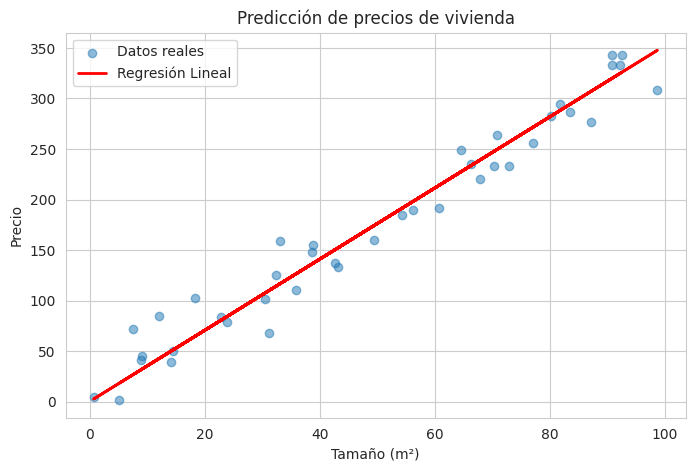

In [6]:
# Gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.5, label="Datos reales")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresión Lineal")
plt.xlabel("Tamaño (m²)")
plt.ylabel("Precio")
plt.title("Predicción de precios de vivienda")
plt.legend()
plt.show()

## Actividades
Haz las siguientes actividades para familiarizarte un poco más con la evaluación un modelo de regresión. Modifica el código anterior y observa los resultados:

1. **Añade más ruido a los datos**. ¿Cómo afecta esto a las métricas?
2. **Ajusta el tamaño del conjunto de entrenamiento**. ¿Qué ocurre si usamos menos datos?
3. **Prueba con transformaciones polinómicas de 2º y 3er grado**. ¿Mejora el ajuste?
